# Determination of the Coefficients of BE equation of LDM :

In [3]:

import numpy as np

elm    = ['D', 'Al', 'Sr', 'Nb', 'Ac']
aM = [2.014102, 26.98153, 87.905612, 143.91009, 227.02775]
Z = [1,13,38,60,89]
N = [1,14,50,84,138]
A = [2,27,88,144,227]

hM = 1.00725
nM = 1.008665

c = 3*10**8
u = 1.6605402*10**(-27)    #kg
e = 1.602*10**(-19)    #Coulomb
uBE = (u*c**2)/(e*10**6)    #MeV

BE = []
fB = []

In [4]:
for i in range(len(Z)):
    be = ((Z[i]*hM+N[i]*nM)-aM[i])*uBE
    BE.append(be)
    fB.append(be/A[i])
    print("Element = ",elm[i], Z[i]," Binding Energy = ",BE[i],"And fB = ",fB[i])

Element =  D 1  Binding Energy =  1.6913254958425499 And fB =  0.8456627479212749
Element =  Al 13  Binding Energy =  218.32372078988493 And fB =  8.086063732958701
Element =  Sr 38  Binding Energy =  749.2376040154962 And fB =  8.514063681994275
Element =  Nb 60  Binding Energy =  1168.6937900865153 And fB =  8.115929097823022
Element =  Ac 89  Binding Energy =  1691.5773755359446 And fB =  7.4518827116120905


In [15]:
Cv = []
Csr = []
Cc = []
Csym = []
Cp = []

for i in range (len(elm)):
    cv = A[i]/A[i]
    csr = (A[i]**2)**(1/3)/A[i]
    cc = (Z[i]*(Z[i]-1))/(A[i]*A[i]**(1/3))
    csym = ((A[i]-2*Z[i])**2)/(A[i]*A[i])
    
    if Z[i]%2==0 and N[i]%2 ==0:
        cp = 1/(A[i]*(A[i]**3)**(1/4))
    elif Z[i]%2==1 and N[i]%2==1:
        cp = - 1/(A[i]*(A[i]**3)**(1/4))
    else:
        cp = 0
        
    Cv.append(cv)
    Csr.append(csr)
    Cc.append(cc)
    Csym.append(csym)
    Cp.append(cp)

    print(Cv[i],'\t',Csr[i],'\t',Cc[i],'\t',Csym[i],'\t',Cp[i],'\t',fB[i])

1.0 	 0.7937005259840997 	 0.0 	 0.0 	 -0.29730177875068026 	 0.8456627479212749
1.0 	 0.33333333333333326 	 1.9259259259259258 	 0.0013717421124828531 	 0 	 8.086063732958701
1.0 	 0.22482215651130455 	 3.5920449097147076 	 0.01859504132231405 	 0.00039550804669534945 	 8.514063681994275
1.0 	 0.19078570709222195 	 4.6901486326837905 	 0.027777777777777776 	 0.00016705736955718338 	 8.115929097823022
1.0 	 0.16392985230732826 	 5.655940983572666 	 0.046595121193890816 	 0 	 7.4518827116120905


In [1]:
#1 av*Cv[1] - asr*Csr[1] - ac*Cc[1] - asym*Csym[1] + ap*Cp[1] = BE[1]   equ(1)
#2 av*Cv[2] - asr*Csr[2] - ac*Cc[2] - asym*Csym[2] + ap*Cp[2] = BE[2]   equ(2)
#1 av*Cv[3] - asr*Csr[3] - ac*Cc[3] - asym*Csym[3] + ap*Cp[3] = BE[3]   equ(3)
#1 av*Cv[4] - asr*Csr[4] - ac*Cc[4] - asym*Csym[4] + ap*Cp[4] = BE[4]   equ(4)
#1 av*Cv[5] - asr*Csr[5] - ac*Cc[5] - asym*Csym[5] + ap*Cp[5] = BE[5]   equ(5)

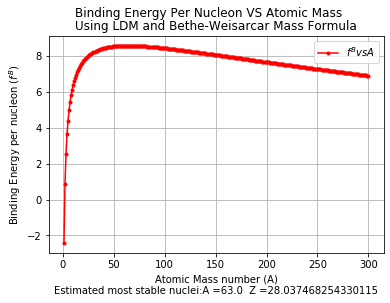

<Figure size 432x288 with 0 Axes>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Calculated Values of the coefficients:
(av, asr, ac, asym, ap) =(16.11040, 19.52574, 0.77, 23.6471, -0.78577) #MeV

AA = np.linspace(1,300,300)
FB = []

def z(A):
    zp = (A/2)*(1/(1+0.0078*A**(2/3)))
    return zp

for i in range(len(AA)):
    fbe = av
    fbe = fbe - asr*(AA[i])**(-1/3) 
    fbe = fbe - ac*(z(AA[i])*(z(AA[i])-1))/(AA[i]**(4/3))
    fbe = fbe - asym*((AA[i]-2*z(AA[i]))**2)/(AA[i]**2) 
    fbe = fbe - ap/(AA[i]**(7/4))
    FB.append(fbe)
    
for i in range(len(FB)):
    if FB[i]>=FB[i-1] and FB[i]>=FB[i+1]:
        Amx = AA[i]
        
plt.plot(AA,FB,'.-r')
plt.grid()
plt.suptitle("Binding Energy Per Nucleon VS Atomic Mass ")
plt.title('Using LDM and Bethe-Weisarcar Mass Formula')
plt.legend(['$f^B vs A$'])
plt.xlabel('Atomic Mass number (A)\nEstimated most stable nuclei:A ='+str(Amx)+'  Z ='+str(z(Amx)))
plt.ylabel('Binding Energy per nucleon $(f^B)$')
plt.show()
plt.savefig('BEperNucleon.png')